In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("daily-inmates-in-custody.csv")
df.head().T

,0,1,2,3,4
INMATEID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
BRADH,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [3]:
original_colnames = df.columns
new_colnames = ['INMATE_ID', 'ADMITTED_DT', 'DISCHARGED_DT', 'CUSTODY_LEVEL', 'MENTAL_OBSERVATION', 'RACE', 'GENDER', 'AGE', 'INMATE_STATUS_CODE', 'SEALED', 'GANG_AFFILIATION', 'TOP_CHARGE', 'INFRACTION']
df = df.rename(columns=dict(zip(original_colnames, new_colnames)))
df.head().T

,0,1,2,3,4
INMATE_ID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
MENTAL_OBSERVATION,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [4]:
df.tail().T

,8223,8224,8225,8226,8227
INMATE_ID,20101081,80499,168995,20197793,20185441
ADMITTED_DT,2018-08-27T12:43:45,2018-08-26T01:16:28,2018-08-27T13:46:28,2018-08-24T20:59:00,2018-06-27T19:18:55
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,MED,MIN,MED,MIN,MAX
MENTAL_OBSERVATION,N,N,N,N,Y
RACE,O,B,O,W,O
GENDER,M,M,M,F,M
AGE,48,51,30,42,21
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


It looks like a lot of the inmates have not been released yet. Also, the older the data is, the less complete it is. Race, gender, age, and top charge are values that are missing from the oldest records.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 13 columns):
INMATE_ID             8228 non-null int64
ADMITTED_DT           8228 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8107 non-null object
MENTAL_OBSERVATION    8228 non-null object
RACE                  8206 non-null object
GENDER                8206 non-null object
AGE                   8218 non-null float64
INMATE_STATUS_CODE    8228 non-null object
SEALED                8228 non-null object
GANG_AFFILIATION      8228 non-null object
TOP_CHARGE            7294 non-null object
INFRACTION            8228 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 835.7+ KB


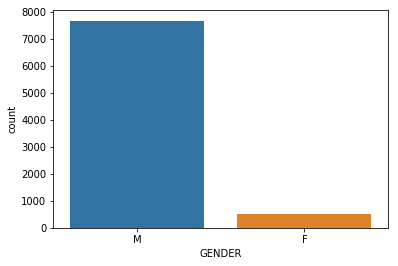

In [6]:
sns.countplot(x = "GENDER", data = df)

Text(0.5,0,'Age')

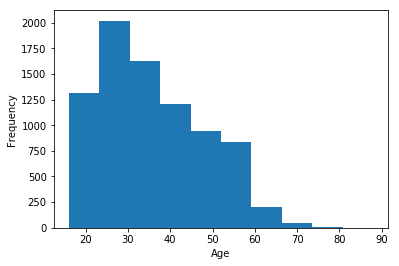

In [7]:
age_df = df["AGE"].dropna()
age_df.plot.hist()
plt.xlabel("Age")

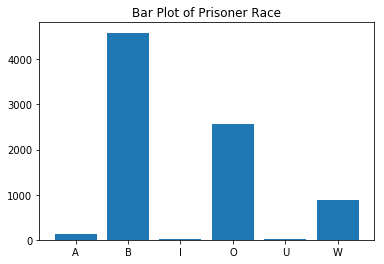

In [8]:
race_df = df["RACE"].dropna()
race_df = pd.get_dummies(race_df)
race_df.head()
heights = []
bars = ['A', 'B', 'I', 'O', 'U', 'W']
for i in list(race_df.columns.values):
    heights.append(race_df[i].sum())
y_pos = np.arange(len(bars))
figure = plt.bar(y_pos, heights)
plt.xticks(y_pos, bars)
plt.title("Bar Plot of Prisoner Race")
plt.show()

Text(0,0.5,'Number of Inmates')

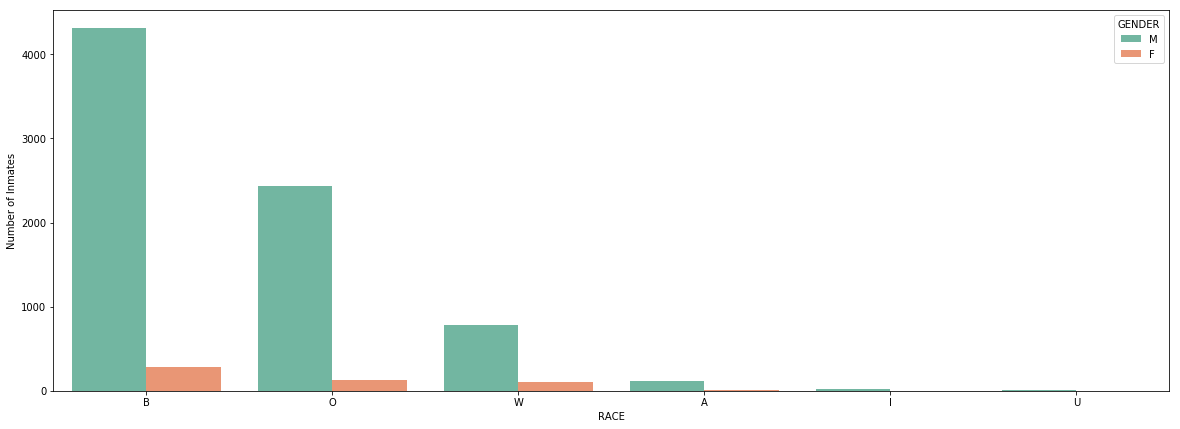

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(x='RACE', hue='GENDER', data=df, palette="Set2",
             order = df['RACE'].value_counts().index)
plt.ylabel("Number of Inmates")

Text(0,0.5,'Number of Inmates')

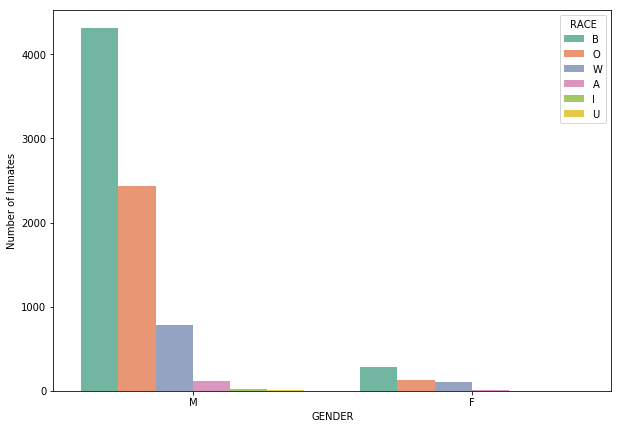

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='GENDER', hue='RACE', data=df, palette="Set2",
             order = df['GENDER'].value_counts().index)
plt.ylabel("Number of Inmates")